In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows',150000)
pd.set_option('display.max_columns',500)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path="/content/drive/MyDrive/football_sevilla_blrfc/2de5d338-216a-4cfb-b466-6fc16cecd233-Bonaventure---Healthcare-data.csv"
# df=pd.read_csv(path)
# df.head()

In [4]:
path="2de5d338-216a-4cfb-b466-6fc16cecd233-Bonaventure---Healthcare-data.csv"
df=pd.read_csv(path)
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [5]:
df.shape

(149999, 18)

In [6]:
df['Stay'].value_counts()

21-30                 42732
20-Nov                34375
31-40                 26455
51-60                 17656
0-10                   9589
41-50                  5509
71-80                  5229
More than 100 Days     3275
81-90                  2490
91-100                 1382
61-70                  1307
Name: Stay, dtype: int64

In [7]:
df['Age'].value_counts()

41-50     30500
31-40     30498
51-60     23575
71-80     18844
21-30     17386
61-70     16938
20-Nov     5705
81-90      4226
0-10       1691
91-100      636
Name: Age, dtype: int64

In [8]:
b_type_map = {"Urgent": 1,"Emergency": 2, "Trauma": 3}
df['Type of Admission_new'] = df['Type of Admission'].map(b_type_map)
df['Type of Admission_new'].value_counts()

3    76546
2    56389
1    17064
Name: Type of Admission_new, dtype: int64

In [9]:
b_type_map = {"Minor": 1,"Moderate": 2, "Extreme": 3}
df['Severity of Illness_new'] = df['Severity of Illness'].map(b_type_map)
df['Severity of Illness_new'].value_counts()

2    86056
1    32700
3    31243
Name: Severity of Illness_new, dtype: int64

In [10]:
b_type_map = {"0-10": 5,"20-Nov": 15, "21-30": 25, "31-40": 35, "41-50": 45, "51-60": 55, "61-70": 65,"71-80": 75,"81-90": 85,"91-100": 95}
df['Age_new'] = df['Age'].map(b_type_map)
df['Age_new'].value_counts()

45    30500
35    30498
55    23575
75    18844
25    17386
65    16938
15     5705
85     4226
5      1691
95      636
Name: Age_new, dtype: int64

In [11]:
b_type_map = {"0-10": 0,"20-Nov": 1, "21-30": 2, "31-40": 3, "41-50": 4, "51-60": 5, "61-70": 6,"71-80": 7,"81-90": 8,"91-100": 9,"More than 100 Days": 10}
df['Stay_new'] = df['Stay'].map(b_type_map)
df['Stay_new'].value_counts()

2     42732
1     34375
3     26455
5     17656
0      9589
4      5509
7      5229
10     3275
8      2490
9      1382
6      1307
Name: Stay_new, dtype: int64

Text(0.5, 1.0, 'Missing Values by column')

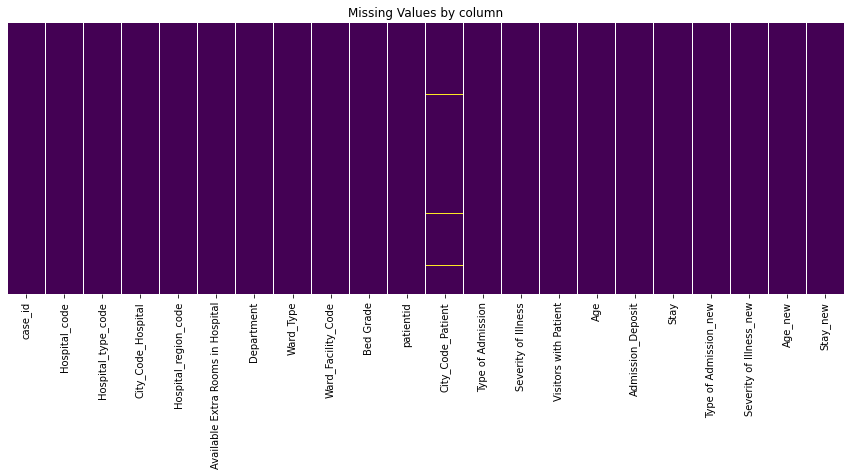

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="viridis" )
plt.title('Missing Values by column')

In [13]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Type of Admission_new',
       'Severity of Illness_new', 'Age_new', 'Stay_new'],
      dtype='object')

In [14]:
df.shape

(149999, 22)

In [15]:
df.dropna(axis=0,inplace=True)
df.shape

(148090, 22)

In [16]:
predictors_df=df[['Admission_Deposit','Visitors with Patient','Available Extra Rooms in Hospital','Age_new','Severity of Illness_new', 'Type of Admission_new','Bed Grade']]
target_val=df['Stay_new']        

Text(0.5, 1.0, 'Missing Values by column')

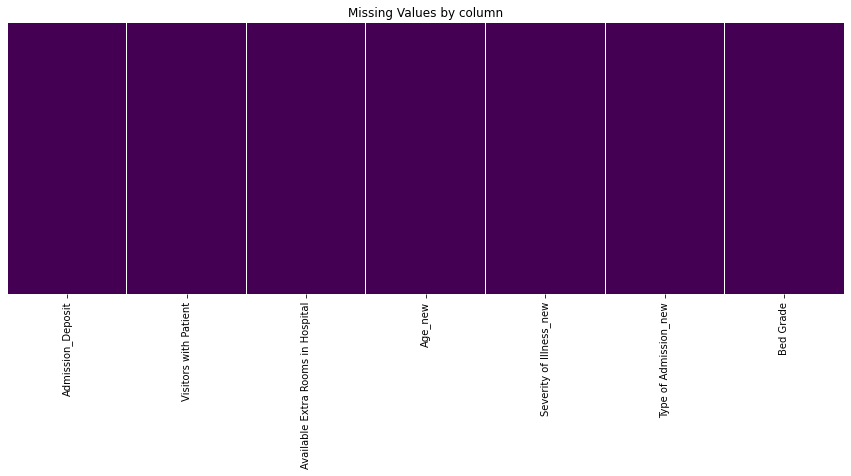

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(predictors_df.isnull(), cbar = False, yticklabels=False, cmap="viridis" )
plt.title('Missing Values by column')

In [18]:
predictors_df.isna().sum()

Admission_Deposit                    0
Visitors with Patient                0
Available Extra Rooms in Hospital    0
Age_new                              0
Severity of Illness_new              0
Type of Admission_new                0
Bed Grade                            0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
train_predictors_val, test_predictors_val, train_target_val, test_target_val = train_test_split(predictors_df,
                                                                                                target_val,
                                                                                                test_size=0.2,
                                                                                                )

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = train_predictors_val  
y = train_target_val

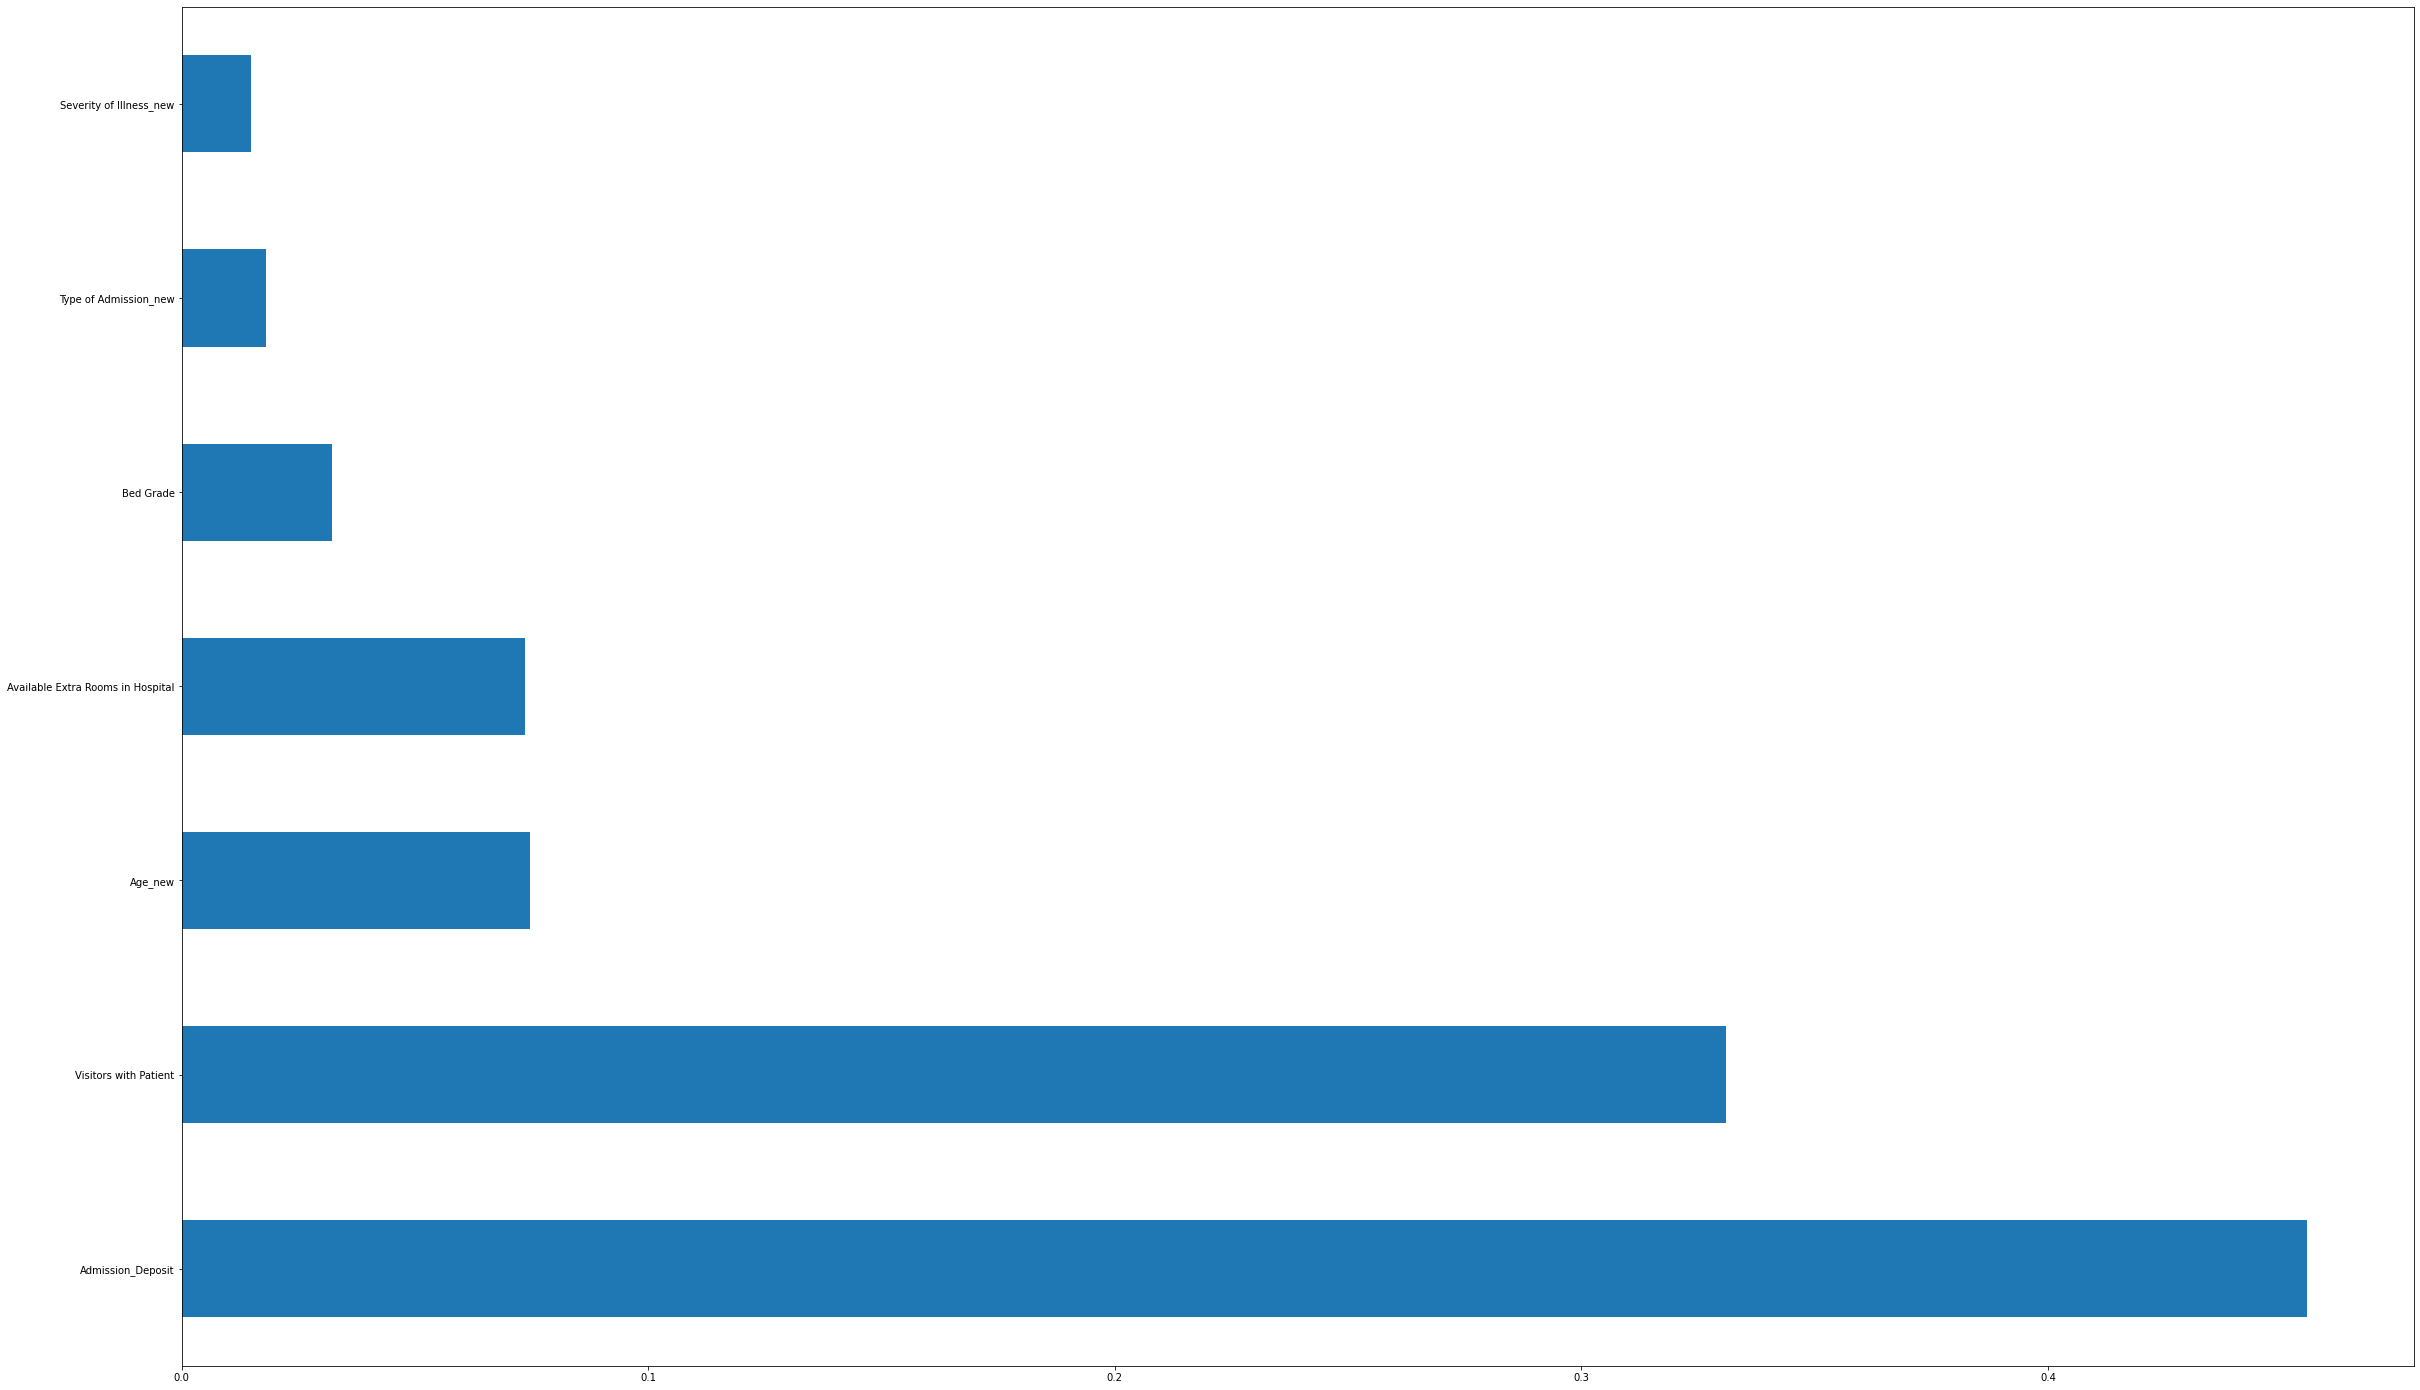

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

#plot graph of feature importances for better visualization
fig, ax = plt.subplots(figsize=(40,25))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(125).plot(kind='barh')
feat_importancesdf=pd.DataFrame(model.feature_importances_)
plt.show()

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier()
rfc.fit(train_predictors_val, train_target_val)

y_pred = rfc.predict(test_predictors_val)
print(accuracy_score(test_target_val, y_pred)*100)
# p_score= precision_score(test_target_val, y_pred)*100
# r_score= recall_score(test_target_val, y_pred)*100
# f1_scores= f1_score(test_target_val, y_pred)
# print(p_score)
# print(r_score)
# print(f1_score)
# 

28.442163549193054


In [23]:
from sklearn.linear_model import LogisticRegression
lre=LogisticRegression()
lre.fit(train_predictors_val, train_target_val)

y_pred = lre.predict(test_predictors_val)
print(accuracy_score(test_target_val, y_pred)*100)
# p_score= precision_score(test_target_val, y_pred)*100
# r_score= recall_score(test_target_val, y_pred)*100
# f1_scores= f1_score(test_target_val, y_pred)
# print(p_score)
# print(r_score)
# print(f1_score)
# 

29.566479843338513


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_predictors_val, train_target_val)

y_pred = svc.predict(test_predictors_val)
print(accuracy_score(test_target_val, y_pred)*100)
# p_score= precision_score(test_target_val, y_pred)*100
# r_score= recall_score(test_target_val, y_pred)*100
# f1_scores= f1_score(test_target_val, y_pred)
# print(p_score)
# print(r_score)
# print(f1_score)
# cant run svc model on laptop 

svc takes too much time to run hence quit it

In [26]:
# Parameter's to search
from sklearn.model_selection import GridSearchCV
n_estimators = [5,10,100]
max_depth = [1,4,8]
min_samples_split = [0.1,0.5,2]
min_samples_leaf = [1,2,4]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = rfc, param_grid = hyperparams, 
                verbose=True, cv=3, scoring = 'accuracy')

# Fitting model and return results
gd.fit(train_predictors_val, train_target_val)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
0.3796424507770042
RandomForestClassifier(max_depth=8, min_samples_leaf=2)


1) Logistic regression had higher accuracy
2) used hyperparameter tuning and increased random forest accuracy
3) remove age column or bed available column because has similar feature importance, and get f1 score
4) best evalution metric for this would be accuracy as their are multiple classes involved